# Desigualdade CHSH-Bell

Consideramos o seguinte observável: $$O = A_{1}(B_{1} + B_{2}) + A_{2}(B_{1} - B_{2}),$$
com
$$A_{j},B_{k}=\pm 1,$$
cujo valor médio é
\begin{equation}
\langle O\rangle_{dl} = \int d\lambda\rho(\lambda) \left\{a_{1}(\lambda)[b_{1}(\lambda) + b_{2}(\lambda)] + a_{2}(\lambda)[b_{1}(\lambda) - b_{2}(\lambda)]\right\}.
\end{equation}
Determinismo: e.g. $a_{j}=a_{j}(\lambda)$, Localidade: e.g. $a_{j}\ne a_{j}(\lambda,b_{k})$.

Valores de $O$: $\pm2$. __Determinismo e localidade__ implicam na desigualdade CHSH: $$-2 \le \langle O\rangle_{dl} \le 2.$$

#### Cálculo usando Mecânica Quântica
Observáveis
$$A_{1}=Z,\ A_{2}=X,\ B_{1}=2^{-1/2}(Z+X),\ B_{2}=2^{-1/2}(Z-X).$$
Pode-se verificar que nesse caso
\begin{equation}
O=\sqrt{2}\big(Z\otimes Z+X\otimes X\big).
\end{equation}
Para a preparação $$|\Psi_{-}\rangle = (|01\rangle-|10\rangle)/\sqrt{2},$$ usando
$Z|0\rangle=|0\rangle,\ Z|1\rangle=-|1\rangle,$ teremos que
\begin{align}
Z\otimes Z|\Psi_{-}\rangle_{AB} & = 2^{-1/2}\left(|0\rangle_{A}\otimes(-|1\rangle_{B}) - (-|1\rangle_{A})\otimes|0\rangle_{B}\right) =-|\Psi_{-}\rangle_{AB}.
\end{align}
De
$X|0\rangle=|1\rangle,\ X|1\rangle=|0\rangle$
temos
$$X\otimes X|\Psi_{-}\rangle_{AB}=-|\Psi_{-}\rangle_{AB}.$$
Assim
\begin{align}
\langle O\rangle_{mq} & = \langle\Psi_{-}|O|\Psi_{-}\rangle = \langle\Psi_{-}|\sqrt{2}(-2|\Psi_{-}\rangle) = -2\sqrt{2}.
\end{align}

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 31.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     

In [ ]:
import numpy as np
import math
from qiskit import QuantumCircuit

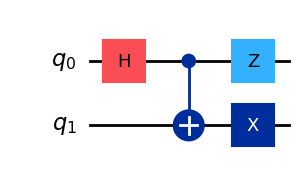

In [ ]:
# cria o circuito quântico para preparar o estado de Bell |Psi->

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(0)
qc.x(1)

qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
XX = Pauli('XX')

observables = [ZZ,XX]

In [ ]:
from qiskit_aer.primitives import Estimator
estimator = Estimator()

## Simulação

In [ ]:
job = estimator.run([qc]*len(observables), observables)

In [ ]:
values = job.result().values
values

array([-1., -1.])

In [ ]:
O_avg_sim = math.sqrt(2)*(values[0]+values[1])
O_avg_sim

-2.8284271247461903

## Experimento

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum",
                               token="e8d1302bb6027e42bb64c2adface70102ccf7c0eebb5540af70ec91cf079aa513876e4c23d652ab18cb8a59b9fa12efbacde922564e7f2bb8463e1f7b1b2915d")
backend = service.backend(name="ibm_brisbane")

In [ ]:
# otimiza o circuito quântico para o backend definido acima
# ao otimizar, os índices dos qubits são trocados pelo transpilador conforme for mais conveniente
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pass_manager.run(qc)
# adapta a lista de operadores para ser medida no circuito quântico transpilado/otimizado
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in observables]

In [ ]:
# parece que o uso do EstimatorV2 simplifica as coisas
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions
options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

csmrv14ea560008fc460


In [ ]:
job_id = 'csmrv14ea560008fc460'
job = service.job(job_id)

In [ ]:
values = job.result()[0].data.evs
values

array([-1.00111732, -1.02681564])

In [ ]:
O_avg_exp = math.sqrt(2)*(values[0]+values[1])
O_avg_exp

-2.8679302968795173

## Comparação

\begin{align}
& |\langle O\rangle_{CHSH}| \le 2, \\
& |\langle O\rangle_{mq}| = 2\sqrt{2} \approx 2.82, \\
& |\langle O\rangle_{sim}| \approx 2.82, \\
& |\langle O\rangle_{exp}| \approx 2.86.
\end{align}

In [ ]:
2*math.sqrt(2)

2.8284271247461903